In [188]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Preprocessing Data

In [84]:
votes_raw = np.loadtxt('house-votes-84.data', dtype=object, delimiter=',')

In [85]:
votes = votes_raw.copy()
votes[votes_raw == 'republican'] = -1
votes[votes_raw == 'democrat'] = 1
votes[votes_raw == 'y'] = 1
votes[votes_raw == 'n'] = -1
votes[votes_raw == '?'] = 0

X, y = votes[:, 1:], votes[:, 0]

In [171]:
def eta(tt, rr):

    val = np.exp(-(tt**2)/(2*rr**2))

    return val.astype(float)

In [178]:
def classifier(a, b):

    W = eta(a, b)
    d = np.sum(W, axis=1)
    D = np.diag(d)
    L = D - W
    ll, VV = np.linalg.eigh(L)
    idx = ll.argsort()
    V = VV[:, idx]
    q1 = V[:, 1]
    result_1 = np.sign(q1)
    result_2 = -np.sign(q1)

    return result_1, result_2, V

In [214]:
dist = scipy.spatial.distance_matrix(X, X, p =2)
sigma_space = np.linspace(0, 4, 401)[1:]

In [215]:
accuracy_space = []

for sigma in sigma_space:
    classifier_1, classifier_2, _ = classifier(dist, sigma)
    accuracy_1 = 1 - np.mean(classifier_1 != y)
    accuracy_2 = 1 - np.mean(classifier_2 != y)
    accuracy = max(accuracy_1, accuracy_2)
    accuracy_space.append(accuracy)

In [216]:
best_accuracy = np.max(accuracy_space)
best_sigma = sigma_space[accuracy_space == best_accuracy]
print('Best Sigma:', best_sigma)
print('Best Accuracy:', best_accuracy)

Best Sigma: [1.16 1.17 1.46 1.47 1.48 2.09 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17
 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31
 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39 2.4  3.32 3.33 3.34 3.35 3.36
 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5
 3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.61 3.62 3.63 3.64
 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.73 3.74 3.75 3.76 3.77 3.78
 3.79 3.8  3.81 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.89 3.9  3.91 3.92
 3.93 3.94 3.95 3.96 3.97 3.98 3.99 4.  ]
Best Accuracy: 0.8804597701149426


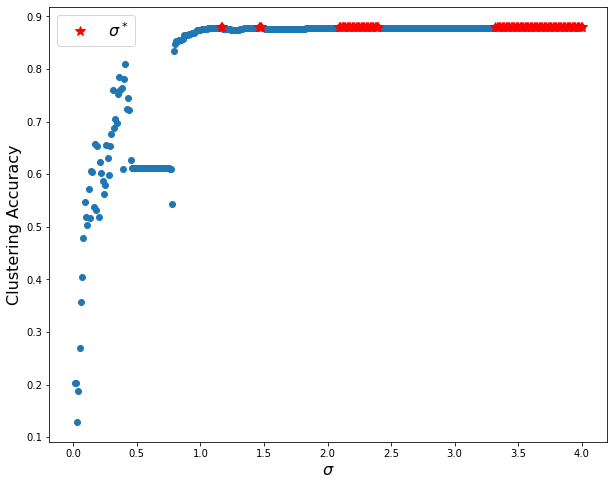

In [176]:
fig = plt.figure(figsize=(10,8))
plt.scatter(sigma_space, accuracy_space)
plt.plot(best_sigma, np.repeat(best_accuracy, len(best_sigma)), 'r*', markersize=10, label='$\sigma^*$')
plt.xlabel('$\sigma$', fontsize=16)
plt.ylabel('Clustering Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.show()

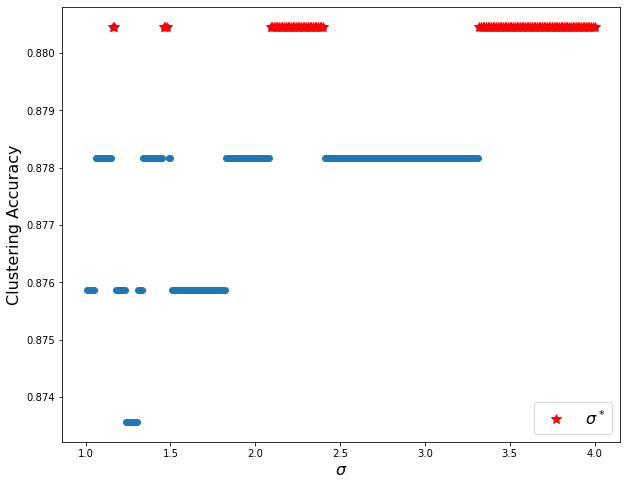

In [177]:
sigma_part = sigma_space[sigma_space > 1]
accuracy_part = np.array(accuracy_space)[sigma_space > 1]

fig = plt.figure(figsize=(10,8))
plt.scatter(sigma_part, accuracy_part)
plt.plot(best_sigma, np.repeat(best_accuracy, len(best_sigma)), 'r*', markersize=10, label='$\sigma^*$')
plt.xlabel('$\sigma$', fontsize=16)
plt.ylabel('Clustering Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [197]:
sigma_space = np.linspace(1, 4, 30001)
accuracy_space = []

for sigma in sigma_space:
    classifier_1, classifier_2, _ = classifier(dist, sigma)
    accuracy_1 = 1 - np.mean(classifier_1 != y)
    accuracy_2 = 1 - np.mean(classifier_2 != y)
    accuracy = max(accuracy_1, accuracy_2)
    accuracy_space.append(accuracy)

In [198]:
best_accuracy = np.max(accuracy_space)
best_sigma = sigma_space[accuracy_space == best_accuracy]
print('Best Sigma:', best_sigma)
print('Best Accuracy:', best_accuracy)

Best Sigma: [1.1567 1.1568 1.1569 ... 3.9998 3.9999 4.    ]
Best Accuracy: 0.8804597701149426


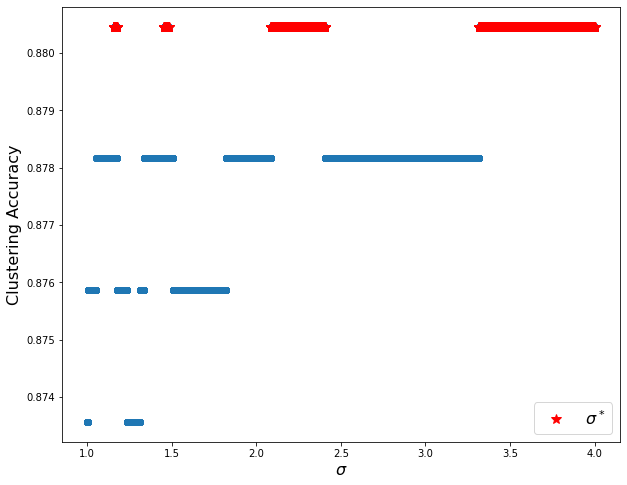

In [199]:
fig = plt.figure(figsize=(10,8))
plt.scatter(sigma_space, accuracy_space)
plt.plot(best_sigma, np.repeat(best_accuracy, len(best_sigma)), 'r*', markersize=10, label='$\sigma^*$')
plt.xlabel('$\sigma$', fontsize=16)
plt.ylabel('Clustering Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Semi-supervised Learning

In [247]:
M_space = [2, 3, 4, 5, 6]
J_space = [5, 10, 20, 40]
sigma_SSL_results = []
SSL_results = np.empty((len(M_space), len(J_space)))

lin = LinearRegression(fit_intercept=False)
for sigma in best_sigma:
    eigen_matrix = classifier(dist, sigma)[2]
    for m_idx, m in enumerate(M_space):
        for j_idx, j in enumerate(J_space):
            F = eigen_matrix[:, 0:m]
            A = F[0:j, :]
            b = y[0:j]
            lin.fit(A, b)
            beta = lin.coef_
            y_pred = np.sign(np.dot(F, beta))
            accuracy = 1 - np.mean(y_pred != y)
            SSL_results[m_idx, j_idx] = accuracy
    sigma_SSL_results.append(SSL_results.copy())

In [251]:
sigma_accuracy = [np.max(x) for x in sigma_SSL_results]
print(sigma_accuracy)

[0.8896551724137931, 0.8896551724137931, 0.8919540229885058, 0.8942528735632184, 0.8942528735632184, 0.9126436781609195, 0.9149425287356322, 0.9149425287356322, 0.9126436781609195, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9287356321839081, 0.9241379310344827, 0.9149425287356322, 0.9172413793103449, 0.9195402298850575, 0.9195402298850575, 0.9218390804597701, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9195402298850575, 0.9218390804597701, 0.9195402298850575, 0.9218390804597701, 0.9218390804597701, 0.9218390804597701, 0.9241379310344827, 0.9241379310344827, 0.9264367816091954, 0.9310344827586207, 0.9333333333333333, 0.9356321839080459, 0.9356321839080459, 0.9356321839080459, 0.9356321839080459,

In [263]:
best_sigma_SSL_accuracy = max(sigma_accuracy)
best_sigma_SSL = best_sigma[sigma_accuracy == best_sigma_SSL_accuracy]
best_sigma_SSL_results = np.array(sigma_SSL_results)[sigma_accuracy == best_sigma_SSL_accuracy]

print(best_sigma_SSL_accuracy)
print(best_sigma_SSL)
print(best_sigma_SSL_results)

0.9356321839080459
[3.41 3.42 3.43 3.44 3.45]
[[[0.86436782 0.86436782 0.87816092 0.87816092]
  [0.90114943 0.85517241 0.89655172 0.88965517]
  [0.44367816 0.93563218 0.90574713 0.91034483]
  [0.49195402 0.64597701 0.90114943 0.91954023]
  [0.48045977 0.54022989 0.88735632 0.90344828]]

 [[0.86436782 0.86436782 0.87816092 0.87816092]
  [0.90114943 0.85517241 0.89655172 0.88965517]
  [0.44137931 0.93563218 0.90574713 0.91034483]
  [0.51034483 0.65517241 0.90114943 0.91954023]
  [0.48045977 0.54022989 0.88735632 0.90574713]]

 [[0.86436782 0.86436782 0.87816092 0.87816092]
  [0.90114943 0.85517241 0.89655172 0.88965517]
  [0.44137931 0.93563218 0.90344828 0.91034483]
  [0.51494253 0.66666667 0.90114943 0.91954023]
  [0.47816092 0.54022989 0.88965517 0.90344828]]

 [[0.86436782 0.86436782 0.87816092 0.87816092]
  [0.90114943 0.85517241 0.89655172 0.88965517]
  [0.44137931 0.93563218 0.90114943 0.90804598]
  [0.51724138 0.68505747 0.90114943 0.91954023]
  [0.48045977 0.54252874 0.88965517 